# Графики для аналитической главы
## Графики используются для ICCT-2024
Данный блокнот пересчитывает параметры протокола RFID и значения BER во
входные данные для имитационных и аналитических моделей,
которые рассчитывают время, необходимое для чтения RFID метки.
Порядок работы с блокнотом:
1) Задать параметры протокола RFID
2) Выбрать номер сценария и задать дополнительные настройки
3) Вычислить входные параметры для моделей (массивы вероятностей и временных промежутков)
4) Запустить расчёт одной или нескольких имитационных моделей
5) Запустить расчёт одной или нескольких аналитических моделей
6) На основе полученных результатов построить графики

### 1й сценарий:

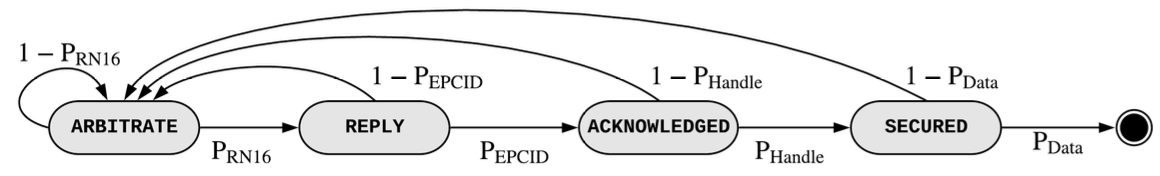

### 2й сценарий:

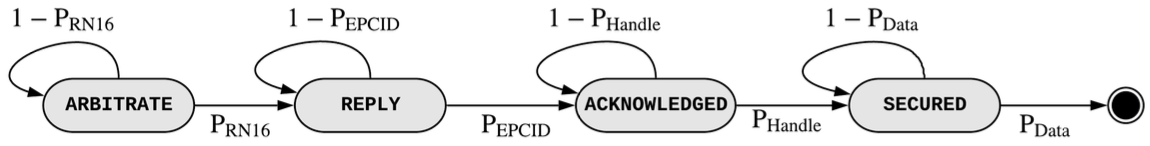

### 3й сценарий:

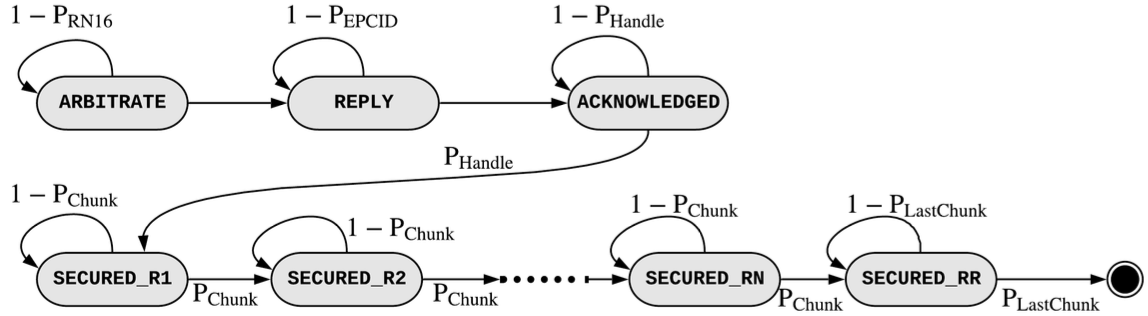

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from utility.graphs_helper import *

# Форматирование и работа с графиками
from utility.jupyter_helpers import setup_matplotlib, get_color, savefig, \
    set_axes_formatter

## Задать константы и параметры моделирования

### Параметры модели

In [2]:
POINTS_NUMBER = 10 # Количество моделируемых точек (= имитационок)
BER = np.linspace(0, 0.01, num=POINTS_NUMBER) # Для рассчёта нескольких точек
# Количество повторов в одной симуляции (чем больше, тем выше точность)
DEFAULT_MAX_TRANSMISSIONS = 2000
delta = 1e-5 # с. Константа для рассчёта времени

### Изменяемые параметры

In [3]:
# Параметры протокола RFID
DRS = [DR.DR_8]
M = [TagEncoding.FM0]
TARI_US = [6.25]
TRExt = (False,)

# Выбор сценариев и режимов
scenario: int = 1 # 1,2,3
words_numbers: tuple = (2, 4, 8, 16) # Для семейства кривых
chunks_number = 1

## Инициализация команд и ответов

In [4]:
chunks_info_list = []
params_list = []
for words_number in words_numbers:
    chunks_info_list.append(calculate_chunks(words_number, chunks_number))

words_in_chunk_position = 0
words_in_last_chunk_position = 1
for i in range(len(chunks_info_list)):
    params_list.append(
        build_messages_df(
            TARI_US, M, DRS, TRExt, chunks_number,
            chunks_info_list[i][words_in_chunk_position],
            chunks_info_list[i][words_in_last_chunk_position]
        )
    )

### Расчёт вероятностей (BER - вход в модель)

Вероятность успешного перехода из одного состояния в другое определяется
исключительно ответами метки (так как во всём проекте сделано допущение, что
если метка оказалась в зоне чтения, то она гарантировано включается, корректно
получает команду считывателя и принимает участие в текущем раунде). Вероятность
перехода в следующее состояние равна вероятности успешного получения считывателем
ответа метки.
Вероятность определяется выражением:
$$ P_{msg} = (1 - BER)^{|msg|} $$
где msg - передаваемое сообщение, BER - вероятность битовой ошибки, |msg| - длина сообщения в битах

In [5]:
probs_list = []
for i in range(len(words_numbers)):
    probs_list.append(prepare_probs(params_list[i], chunks_number, BER, POINTS_NUMBER))

### Расчёт времён (время команд - вход в модель)

Время перехода из одного состояния в другое вычисляется по формулам:
$$T_{Arbitrate} = T_{Query} + T_1 + T_{RN16} + T_2 + 2\delta$$ 
$$T_{Reply} = T_{Ack} + T_1 + T_{EPC} + T_2 + 2\delta$$
$$T_{Acknowledged} = T_{Req_RN} + T_1 + T_{Handle} + T_2 + 2\delta$$
$$T_{Secured} = T_{Read} + T_1 + T_{Data} + T_2 + 2\delta$$
$$T_{Secured.Ri} = T_{Read} + T_1 + T_{Chunk.i} + T_2 + 2\delta$$
$$T_{Secured.LC} = T_{Read} + T_1 + T_{Last.Chunk} + T_2 + 2\delta$$
где $T_{msg.name}$ - длительность команды считывателя или ответа метки, 
$T_{Secured.Ri}$ - длительность для i-го 'чанка', 
$T_{Secured.ДС}$ - длительность последнего 'чанка', 
$T_1$ и $T_2$ - параметры, определяемые протоколом RFID (в блокноте рассчитываются с помощью функций), 
$\delta$ - время распространения сигнала (в блокноте определяется как взятая наобум константа)

In [6]:
t_list = []
for i in range(len(words_numbers)):
    t_list.append(prepare_times(params_list[i], probs_list[i], chunks_number))

### Подготовка входных данных для имитационных моделей

In [7]:
dicts_list = []
for i in range(len(words_numbers)):
    dicts_list.append(create_dicts(probs_list[i], t_list[i], chunks_number, scenario, DEFAULT_MAX_TRANSMISSIONS))

### Запуск имитационных моделей

In [11]:
results_list = []
for i in range(len(words_numbers)):
    # Результат работы одного пакета имитационок (одна кривая)
    one_packet = run_set_simulations(dicts_list[i])
    res = []
    for i in one_packet:
        res.append(i.sim_time/DEFAULT_MAX_TRANSMISSIONS*1_000) # миллисекунды
    results_list.append(res)

Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена
Симуляция завершена


### Запуск аналитических моделей

In [13]:
# all_phases_1 = convert_data_for_analitica(probs_1, t_1)
# all_phases_2 = convert_data_for_analitica(probs_2, t_2)

# analit_res_1 = run_analitica(scenario, all_phases_1)
# analit_res_2 = run_analitica(scenario, all_phases_2)

### Построение графиков

In [14]:
setup_matplotlib()

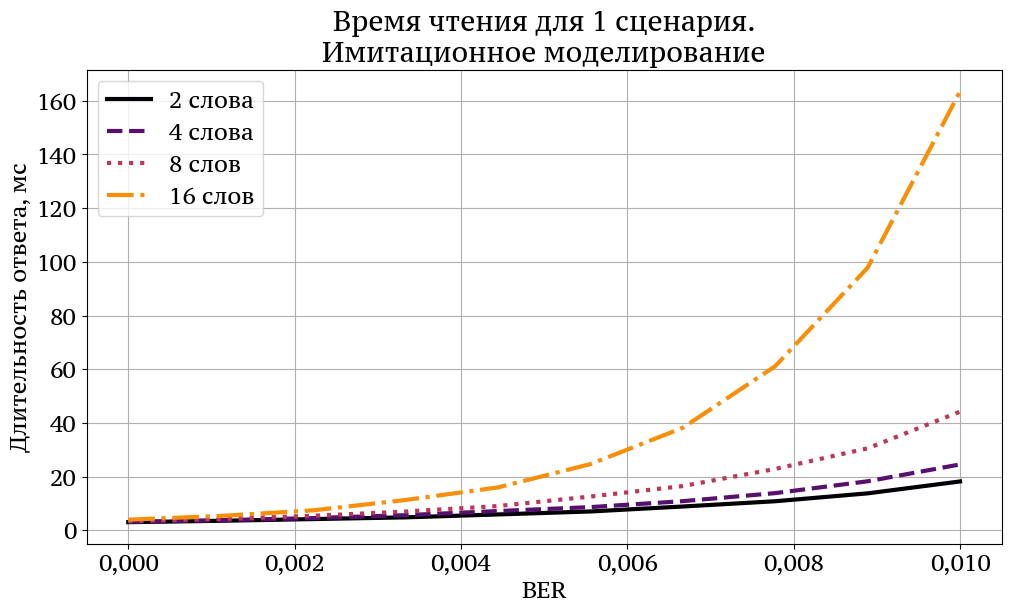

In [31]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.set_xlabel('BER') 
ax.set_ylabel('Длительность ответа, мс')
ax.set_title(f'Время чтения для {scenario} сценария.\nИмитационное моделирование')

ax.plot(
    BER, results_list[0],
    linewidth=3, linestyle='-',
    label=f'{words_numbers[0]} слова',
    color=get_color(0)
)
ax.plot(
    BER, results_list[1],
    linewidth=3, linestyle='--',
    label=f'{words_numbers[1]} слова',
    color=get_color(0.25)
)

ax.plot(
    BER, results_list[2],
    linewidth=3, linestyle='dotted',
    label=f'{words_numbers[2]} слов',
    color=get_color(0.5)
)

ax.plot(
    BER, results_list[3],
    linewidth=3, linestyle='dashdot',
    label=f'{words_numbers[3]} слов',
    color=get_color(0.75)
)
plt.legend()
plt.grid()
plt.savefig(f'Имитационка для {scenario} сценария.')